# Worked with:

## Trevor Mathisen
## Viet Nguyen

In [1]:
from numpy import set_printoptions, logspace, mean, std
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import seaborn as sns

## 3. Use the Wine dataset (check under ML dataset Module on Canvas)

In [2]:
filename = 'wine.csv'
# Column names added to csv including 'Class' as the first column/output variable
data = read_csv(filename)

## Exploratory Data Analysis

In [3]:
set_printoptions(precision=3)
print(data.head(5))
print(data.isnull().sum())
print(f'{data.shape[0]} rows and {data.shape[1]} columns')
for column in data.columns:
    print(column)
    print(data[column].unique())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

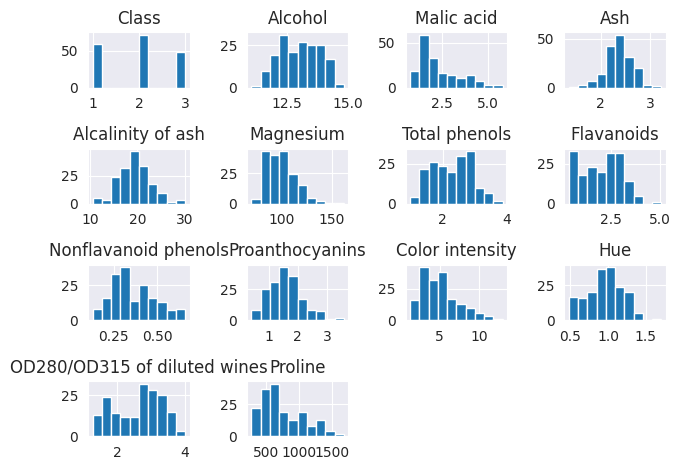

                                 Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

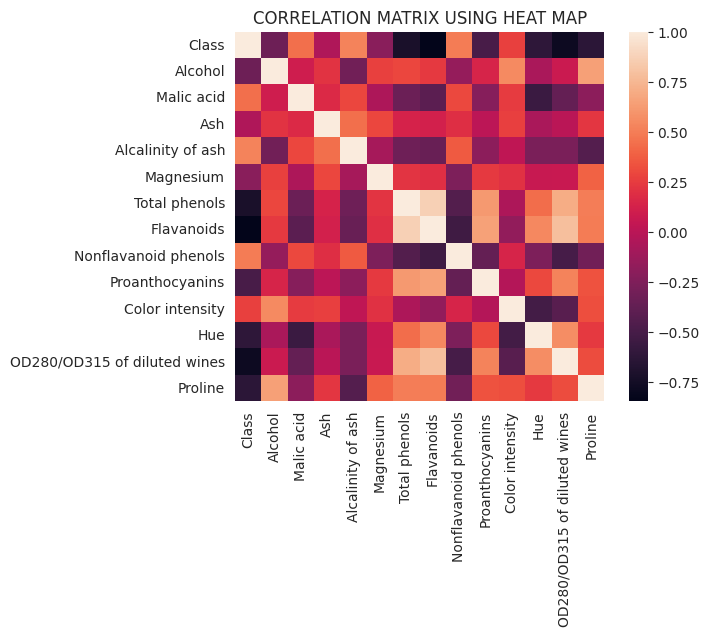

<Figure size 640x480 with 0 Axes>

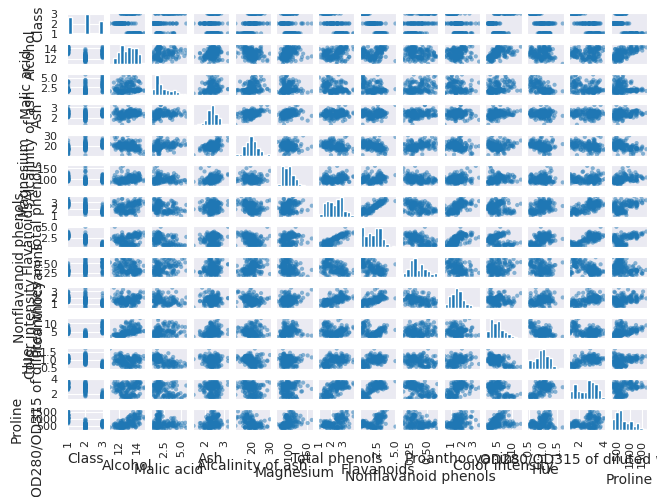

In [4]:
def data_info(_data):
    print(_data.describe())
    _data.hist()
    plt.tight_layout()
    plt.show()
    plt.figure() # new plot
    plt.tight_layout()
    corMat = _data.corr(method='pearson')
    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.title(f"CORRELATION MATRIX USING HEAT MAP")
    plt.show()

    ## scatter plot of all _data
    plt.figure()
    # # The output overlaps itself, resize it to display better (w padding)
    scatter_matrix(_data)
    plt.tight_layout(pad=0.1)
    plt.show()

data_info(data)

## Standardize the data as all are continuous variables and appear mostly guassian

In [5]:
Y1 = data['Class']
data_stand = data.copy()
X1_stand = data.drop(columns=['Class'])
X1_stand = StandardScaler().fit(X1_stand).transform(X1_stand)

In [6]:
from matplotlib import pyplot

def evaluate_each_model_in_turn(models, X, Y):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    ## boxplot algorithm comparison
    fig = pyplot.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.show()

## 3.
## add an SV Classifier(SVC: use the default settings given in the sample code, use RFB kernel with C = 1.0)
## a random forest classifier with a depth of 2
## and an Adaboost classifier
## and compare them using kfold cross validation with k=10.

SVC: 0.979048 (0.032029)
Random Forest: 0.972381 (0.033860)
AdaBoost: 0.936667 (0.049900)


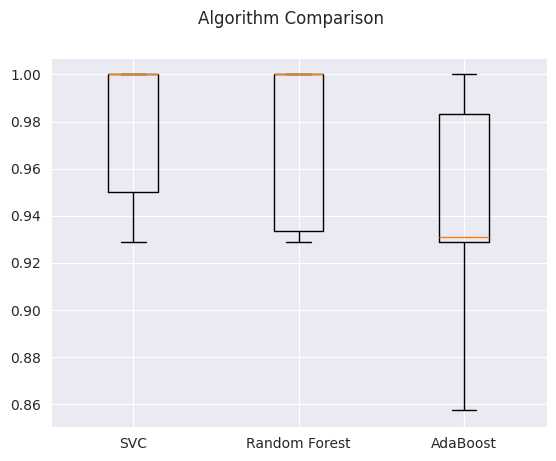

In [7]:
# add an SV Classifier(SVC), a random forest classifier with a depth of 2 and an Adaboost
# classifier and compare them using kfold cross validation with k=10. For the SVC, use
# the default settings given in the sample code, use RFB kernel with C = 1.0
models = []
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
svc_model = ('SVC', SVC(kernel='rbf', C=1.0, random_state=1, probability=True))
models.append(svc_model)
models.append(('Random Forest', RandomForestClassifier(max_depth=2, random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=1)))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1_stand, Y1, test_size=0.2)

evaluate_each_model_in_turn(models, X_train, Y_train)

## 4. Plot all the accuracy results vs. each model (model type on the x-axis and accuracy on the y-axis)

### Results:
### 1. The SVC with RBF kernel has the highest accuracy.
### 2. The AdaBoost classifier has the lowest accuracy.
### 3. SVC also has the lowest standard deviation, indicating more stable performance.
### 4. In all runs, SVC continuously outperformed the other classifiers.

SVC Accuracy: 1.0000
Random Forest Accuracy: 0.9722
AdaBoost Accuracy: 0.9444


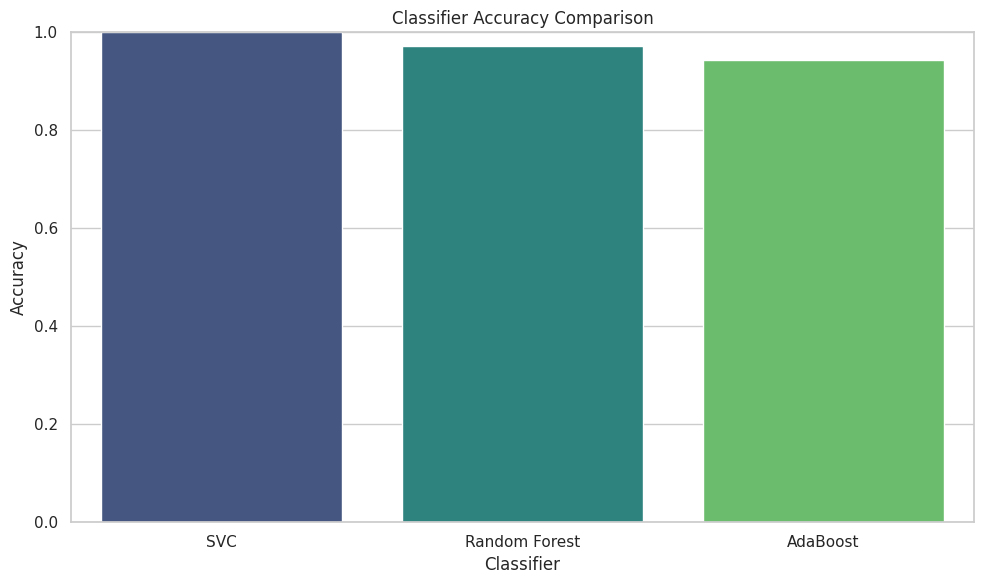

In [8]:
accuracy_dict = {}
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, Y_test)
    accuracy_dict[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Plotting the accuracies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")
methods = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=accuracies, hue=methods, palette="viridis", legend=False)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy domain
plt.tight_layout()
plt.show()

## 5. Try a polynomial kernel by setting kernel = ‘poly’ and change the kernel degree from 2 – 5.
## 6. Compare the results with the RBF kernel and the same value of C=1.0

### Results:
### The RBF kernel significantly outperforms the polynomial kernel in accuracy. The polynomial kernel has both lower accuracy and higher variance in cross-validation scores, indicating less robust performance across different data subsets.

SVC: 0.979048 (0.032029)
Poly SVC: 0.815714 (0.107835)


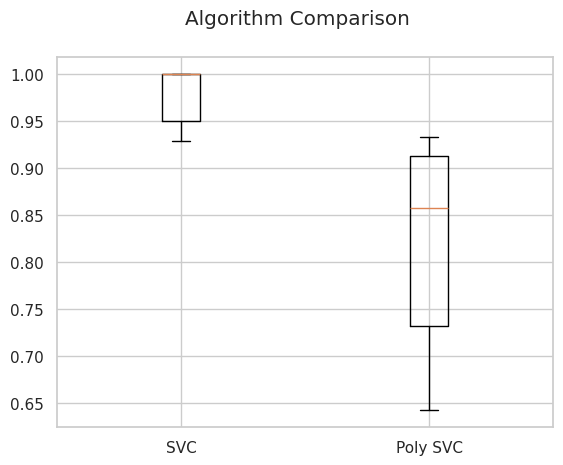

In [9]:
poly_svc_model = SVC(kernel='poly', degree=5, C=1.0, random_state=1, probability=True)
# fit and append
poly_svc_model.fit(X_train, Y_train)
y_pred_poly = poly_svc_model.predict(X_test)
accuracy_poly = poly_svc_model.score(X_test, Y_test)
poly_svc = ('Poly SVC', poly_svc_model)
accuracy_dict[poly_svc[0]] = accuracy_poly
models.append(poly_svc)


compare_svc_models = [svc_model, poly_svc]
evaluate_each_model_in_turn(compare_svc_models, X_train, Y_train)

## 7. Write down your observation on the comparison results.

### Results:
### 1. The RBF kernel significantly outperforms the polynomial kernel in accuracy.
### 2. The polynomial kernel has both lower accuracy and higher variance in cross-validation scores, indicating less robust performance across different data subsets.
### 3. Despite the accuracy differences, the polynomial kernel still achieves excellent ROC AUC, suggesting good ranking capabilities even when making some classification errors.


## 8. Plot the multi-class ROC curve and use the roc_auc_score function to calculate ROC score.


### Results:
### 1. Both SVC and Random Forest achieve perfect ROC AUC scores despite Random Forest having lower accuracy. This suggests Random Forest still ranks predictions correctly even when it makes some misclassifications.
### 2. AdaBoost performs slightly worse but still shows excellent performance

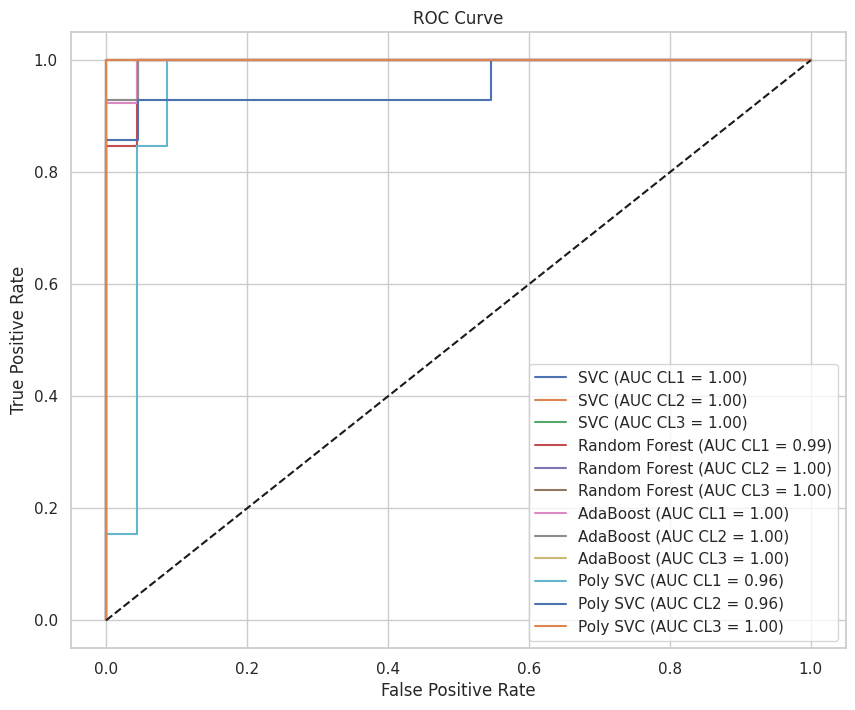

SVC - Micro-average ROC AUC: 1.0000
Random Forest - Micro-average ROC AUC: 0.9973
AdaBoost - Micro-average ROC AUC: 0.9982
Poly SVC - Micro-average ROC AUC: 0.9746


In [12]:
# Plot the multi-class ROC curve and use the roc_auc_score function to calculate ROC
# AUC for each class.
from sklearn.metrics import roc_curve, roc_auc_score

# Now you can calculate and plot ROC curves
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# For multi-class problems, you need to binarize the output
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = y_test_bin.shape[1]

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models:
    # Getting probabilities
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC for the first class as an example
    # plt.plot(fpr[0], tpr[0], label=f'{name} (AUC = {roc_auc[0]:.2f})')
    # Plot ROC for all classes
    plt.plot(fpr[0], tpr[0], label=f'{name} (AUC CL1 = {roc_auc[0]:.2f})')
    plt.plot(fpr[1], tpr[1], label=f'{name} (AUC CL2 = {roc_auc[1]:.2f})')
    plt.plot(fpr[2], tpr[2], label=f'{name} (AUC CL3 = {roc_auc[2]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate micro-average ROC curve and ROC area (will average performance across all classes)
for name, model in models:
    y_score = model.predict_proba(X_test)
    y_pred = model.predict(X_test)

    # Calculate and print micro-average ROC AUC score
    print(f"{name} - Micro-average ROC AUC: {roc_auc_score(Y_test, y_score, multi_class='ovo'):.4f}")